#**Data Cleansing**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Traffic_Crashes_-_Crashes.csv')

In [3]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,00a530520c84927490b597a6220ff3f2a3347472ef3086...,NaN,01/15/2025 01:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,RAMP,...,0.0,0.0,1.0,0.0,13,4,1,41.816073,-87.656743,POINT (-87.656742699936 41.816073475493)
1,027187f52f9cac9ec542f1dda3a9ca8804db1fc2d2a386...,NaN,05/31/2020 01:13:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,...,0.0,0.0,4.0,0.0,1,1,5,41.878326,-87.701280,POINT (-87.701279794376 41.878326229569)
2,0173d218723a1d608d77b7142ca9b9a4afd7463e824162...,Y,09/23/2023 10:39:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,10,7,9,42.010386,-87.670011,POINT (-87.67001097385 42.010385766289)
3,0386ef145c229cc3cb409c51d647b6496ab660104f16c7...,NaN,06/26/2023 01:54:00 PM,30,NO CONTROLS,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,CENTER TURN LANE,...,0.0,0.0,3.0,0.0,13,2,6,41.873435,-87.666434,POINT (-87.666433681443 41.8734345658)
4,26205ab4bcce4f6c3751a4947c94e5ad28b0dc0738cb27...,NaN,12/22/2019 08:11:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,20,1,12,41.715805,-87.643208,POINT (-87.643208253244 41.715804770128)


In [4]:
print(df.columns)

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [5]:
# Remove columns where where are more than 50% of the total values are none
missing_percentage = df.isnull().mean() * 100
columns_with_high_nan = missing_percentage[missing_percentage > 50].index.tolist()
df.drop(columns=columns_with_high_nan, inplace=True)

In [6]:
print(df.columns)

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')


In [7]:
# Remove duplicate rows w.r.t CRASH_RECORD_ID
df.drop_duplicates(subset='CRASH_RECORD_ID', keep='first', inplace=True)

In [8]:
# Replace the none value in the REPORT_TYPE column with UNKOWN value
df['REPORT_TYPE'].fillna('UNKOWN', inplace=True)

<ipython-input-8-9470aaef9e05>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['REPORT_TYPE'].fillna('UNKOWN', inplace=True)


In [9]:
# Replace the none value in the MOST_SEVERE_INJURY column with UNKOWN value
df['MOST_SEVERE_INJURY'].fillna('UNKNOWN', inplace=True)

<ipython-input-9-036aca900253>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MOST_SEVERE_INJURY'].fillna('UNKNOWN', inplace=True)


In [10]:
injuries_cloumns = ['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
                    'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']
for column in injuries_cloumns:
    df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-10-933de2a7b8d1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [11]:
# Remove the rows with null values
df.dropna(inplace=True)

In [12]:
df.drop('LOCATION', axis=1, inplace=True)

In [13]:
# Convert the date time to seperate column for date and time
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
# Convert the time to 24 hours
df['CRASH_TIME'] = df['CRASH_DATE'].dt.strftime('%H:%M:%S')
df['CRASH_DATE'] = df['CRASH_DATE'].dt.date

<ipython-input-13-fc67089211f6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])


In [14]:
# Move the new crash time next to crash date
column_order = df.columns.tolist()
column_order.insert(column_order.index('CRASH_DATE') + 1, column_order.pop(column_order.index('CRASH_TIME')))
df = df[column_order]

# Verify the column order
print(df.head())

                                     CRASH_RECORD_ID  CRASH_DATE CRASH_TIME  \
0  00a530520c84927490b597a6220ff3f2a3347472ef3086...  2025-01-15   13:50:00   
1  027187f52f9cac9ec542f1dda3a9ca8804db1fc2d2a386...  2020-05-31   01:13:00   
2  0173d218723a1d608d77b7142ca9b9a4afd7463e824162...  2023-09-23   10:39:00   
3  0386ef145c229cc3cb409c51d647b6496ab660104f16c7...  2023-06-26   13:54:00   
4  26205ab4bcce4f6c3751a4947c94e5ad28b0dc0738cb27...  2019-12-22   20:11:00   

   POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION  \
0                  30            NO CONTROLS           NO CONTROLS   
1                  30         TRAFFIC SIGNAL               UNKNOWN   
2                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   
3                  30            NO CONTROLS  FUNCTIONING PROPERLY   
4                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   

  WEATHER_CONDITION      LIGHTING_CONDITION      FIRST_CRASH_TYPE  \
0             CLEAR                

In [15]:
# Convert the date time to seperate column for date and time
df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(df['DATE_POLICE_NOTIFIED'])
# Convert the time to 24 hours
df['TIME_POLICE_NOTIFIED'] = df['DATE_POLICE_NOTIFIED'].dt.strftime('%H:%M:%S')
df['DATE_POLICE_NOTIFIED'] = df['DATE_POLICE_NOTIFIED'].dt.date

<ipython-input-15-9e68dc111bf8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(df['DATE_POLICE_NOTIFIED'])


In [16]:
# Move the new TIME_POLICE_NOTIFIED next to DATE_POLICE_NOTIFIED
column_order = df.columns.tolist()
column_order.insert(column_order.index('DATE_POLICE_NOTIFIED') + 1, column_order.pop(column_order.index('TIME_POLICE_NOTIFIED')))
df = df[column_order]

In [17]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE,CRASH_TIME,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,00a530520c84927490b597a6220ff3f2a3347472ef3086...,2025-01-15,13:50:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,RAMP,...,0.0,0.0,0.0,1.0,0.0,13,4,1,41.816073,-87.656743
1,027187f52f9cac9ec542f1dda3a9ca8804db1fc2d2a386...,2020-05-31,01:13:00,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,...,0.0,0.0,0.0,4.0,0.0,1,1,5,41.878326,-87.701280
2,0173d218723a1d608d77b7142ca9b9a4afd7463e824162...,2023-09-23,10:39:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,0.0,1.0,0.0,10,7,9,42.010386,-87.670011
3,0386ef145c229cc3cb409c51d647b6496ab660104f16c7...,2023-06-26,13:54:00,30,NO CONTROLS,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,CENTER TURN LANE,...,0.0,0.0,0.0,3.0,0.0,13,2,6,41.873435,-87.666434
4,26205ab4bcce4f6c3751a4947c94e5ad28b0dc0738cb27...,2019-12-22,20:11:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,0.0,2.0,0.0,20,1,12,41.715805,-87.643208


In [18]:
df.to_csv('cleaned_dataset.csv', index=False)

#**Data Visualization**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('/content/cleaned_dataset.csv')

In [21]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE,CRASH_TIME,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,00a530520c84927490b597a6220ff3f2a3347472ef3086...,2025-01-15,13:50:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,RAMP,...,0.0,0.0,0.0,1.0,0.0,13,4,1,41.816073,-87.656743
1,027187f52f9cac9ec542f1dda3a9ca8804db1fc2d2a386...,2020-05-31,01:13:00,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,...,0.0,0.0,0.0,4.0,0.0,1,1,5,41.878326,-87.701280
2,0173d218723a1d608d77b7142ca9b9a4afd7463e824162...,2023-09-23,10:39:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,0.0,1.0,0.0,10,7,9,42.010386,-87.670011
3,0386ef145c229cc3cb409c51d647b6496ab660104f16c7...,2023-06-26,13:54:00,30,NO CONTROLS,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,CENTER TURN LANE,...,0.0,0.0,0.0,3.0,0.0,13,2,6,41.873435,-87.666434
4,26205ab4bcce4f6c3751a4947c94e5ad28b0dc0738cb27...,2019-12-22,20:11:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,0.0,2.0,0.0,20,1,12,41.715805,-87.643208


In [22]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], format='%Y-%m-%d')

# Add new columns for 'Month' and 'Day of Week' and 'Year' and 'Hour'
df['Month'] = df['CRASH_DATE'].dt.month
df['Day_of_Week'] = df['CRASH_DATE'].dt.day_name()
df['Year'] = df['CRASH_DATE'].dt.year
df['Hour'] = pd.to_datetime(df['CRASH_TIME'], format='%H:%M:%S').dt.hour

<ipython-input-23-cbce267f276c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='viridis')


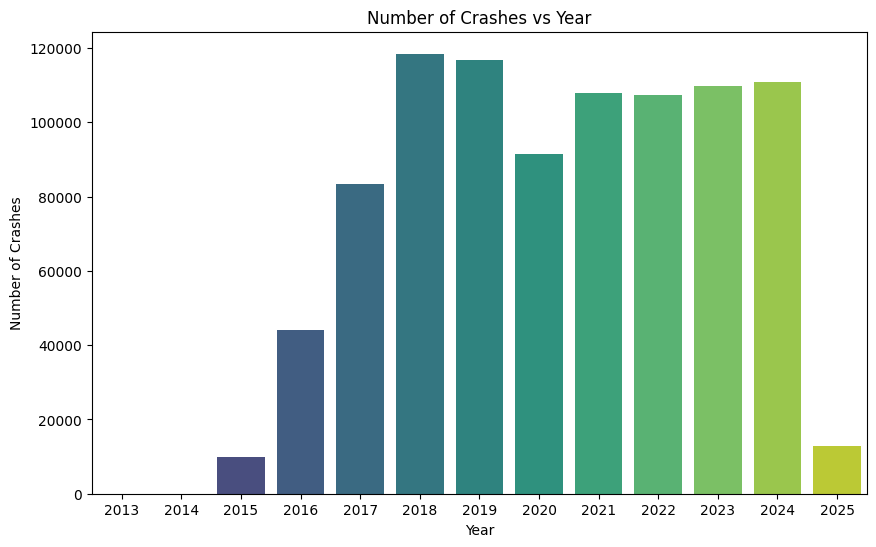

In [23]:
# Plotting Number of Crashes vs Year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title('Number of Crashes vs Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()

<ipython-input-24-401a6a1bd796>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='viridis')


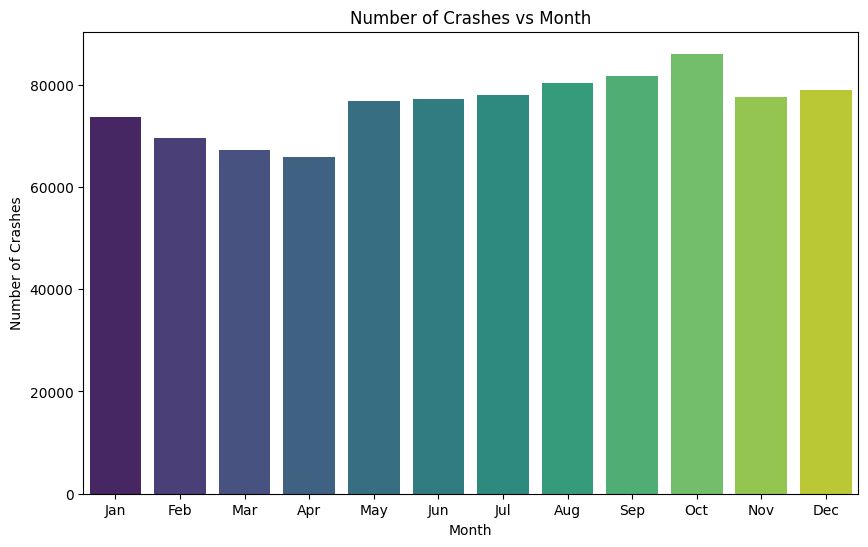

In [24]:
# Plotting Number of Crashes vs Month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='viridis')
plt.title('Number of Crashes vs Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<ipython-input-25-2b602dd0fe4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=df, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


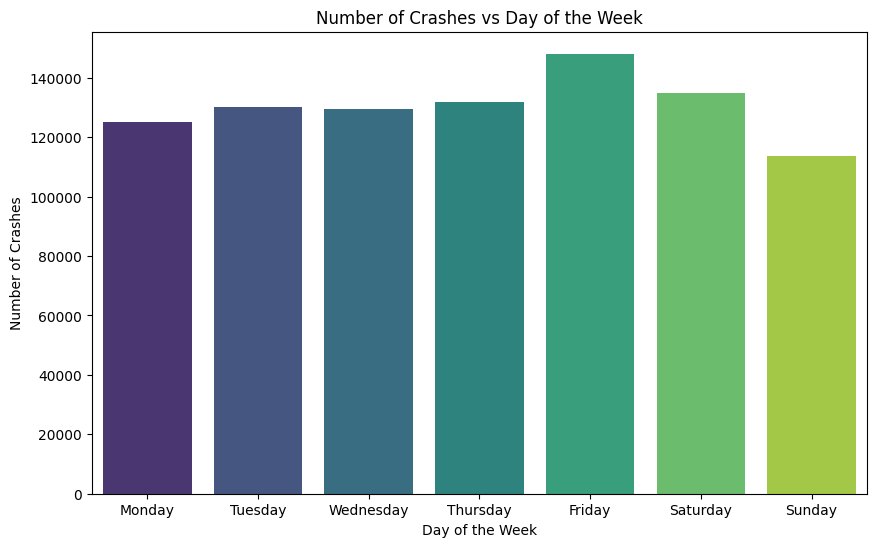

In [25]:
# Plotting Number of Crashes vs Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=df, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Crashes vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.show()

<ipython-input-26-29cd744ae9f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


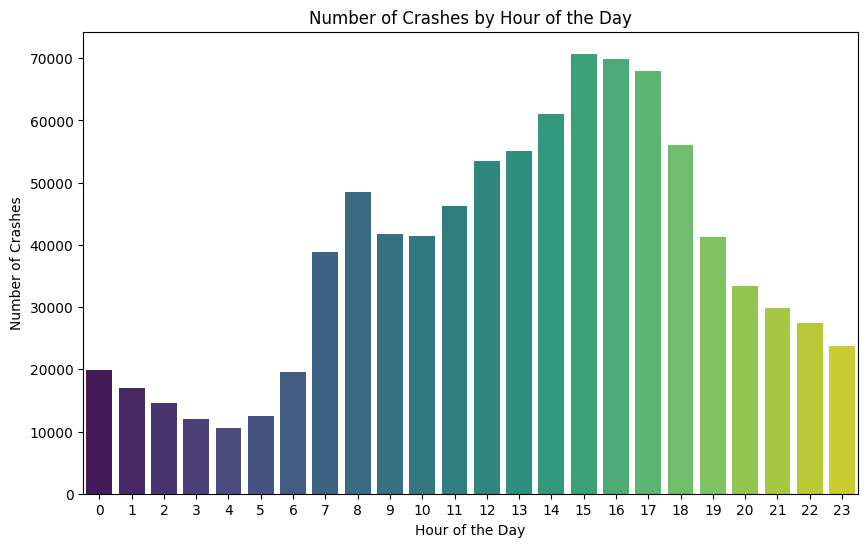

In [26]:
# Plotting Number of Crashes by Hour of the Day
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Number of Crashes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.show()

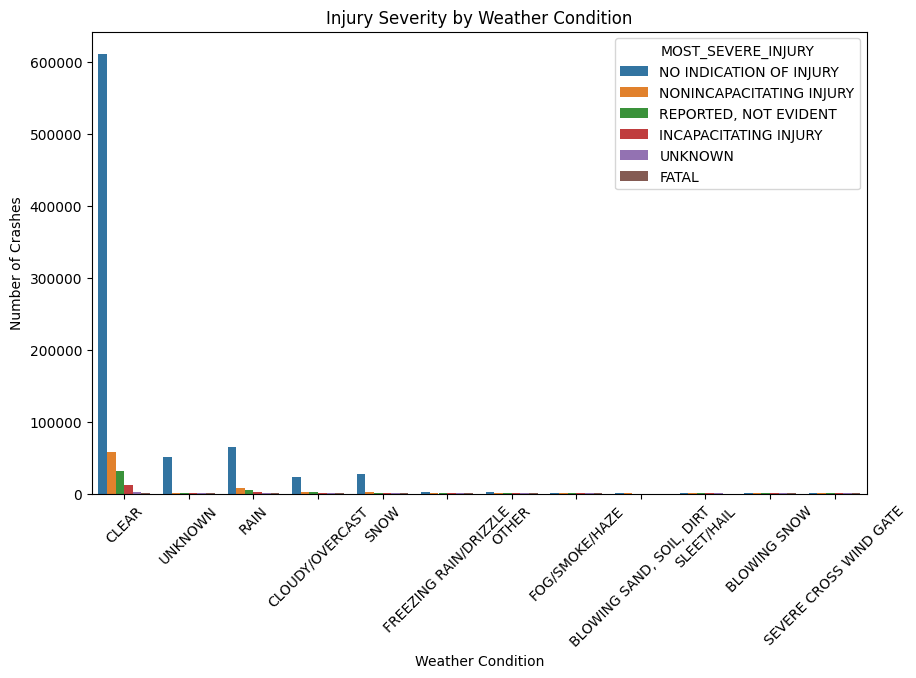

In [27]:
# Plot injury severity by weather condition
plt.figure(figsize=(10, 6))
sns.countplot(x='WEATHER_CONDITION', hue='MOST_SEVERE_INJURY', data=df)
plt.title('Injury Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

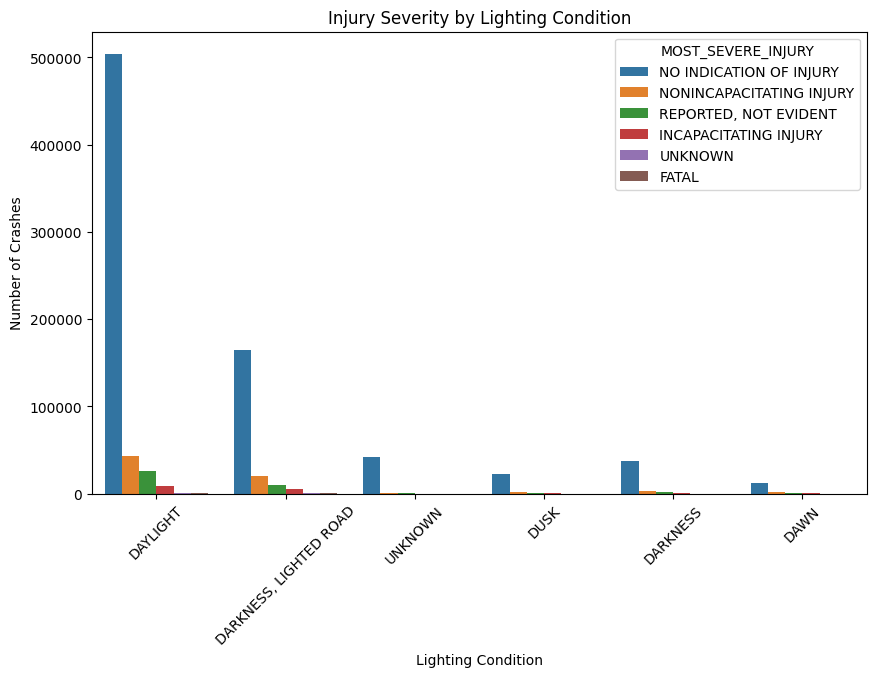

In [28]:
# Plot injury severity by lighting condition
plt.figure(figsize=(10, 6))
sns.countplot(x='LIGHTING_CONDITION', hue='MOST_SEVERE_INJURY', data=df)
plt.title('Injury Severity by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

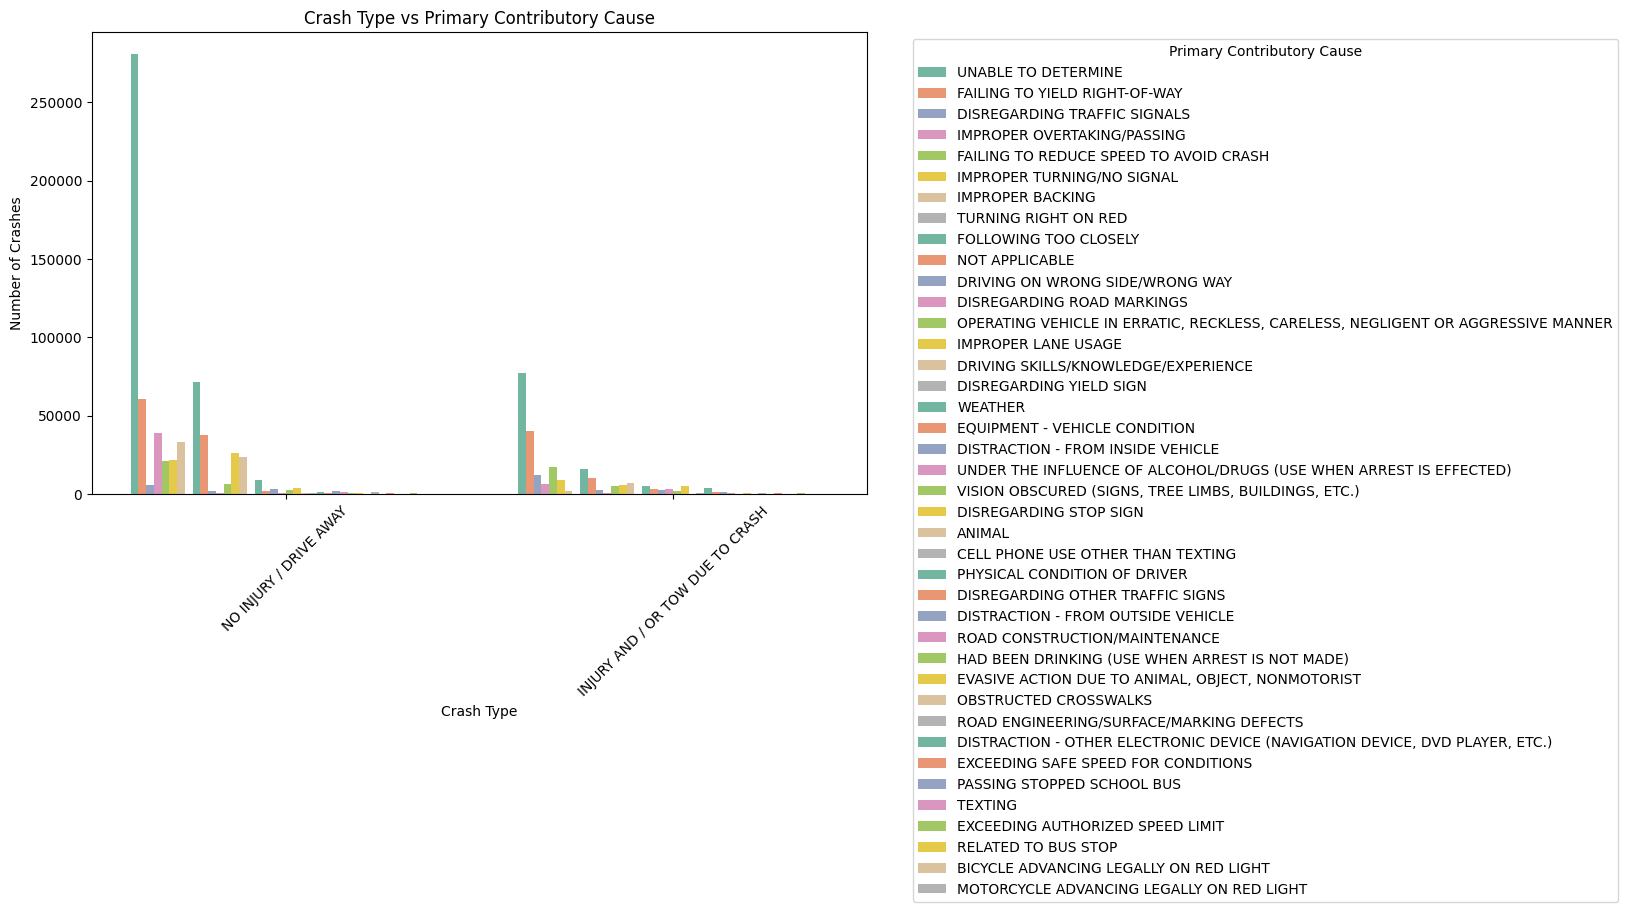

In [29]:
# Primary contributor of the crash
plt.figure(figsize=(10, 6))
sns.countplot(x='CRASH_TYPE', hue='PRIM_CONTRIBUTORY_CAUSE', data=df, palette='Set2')  # Using Set2 for distinct colors
plt.title('Crash Type vs Primary Contributory Cause')
plt.xlabel('Crash Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.legend(title='Primary Contributory Cause', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


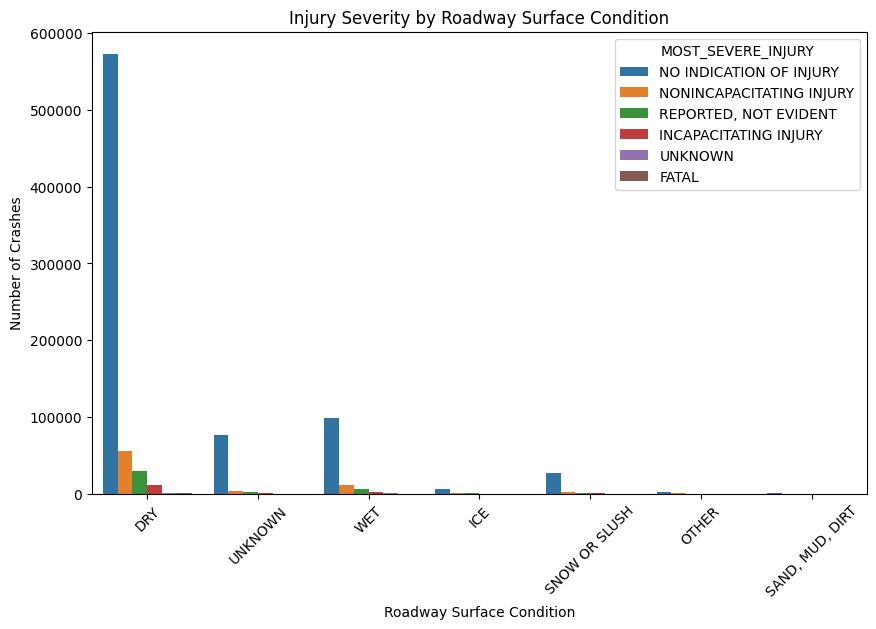

In [30]:
# Plot severity of injury by roadway surface condition
plt.figure(figsize=(10, 6))
sns.countplot(x='ROADWAY_SURFACE_COND', hue='MOST_SEVERE_INJURY', data=df)
plt.title('Injury Severity by Roadway Surface Condition')
plt.xlabel('Roadway Surface Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

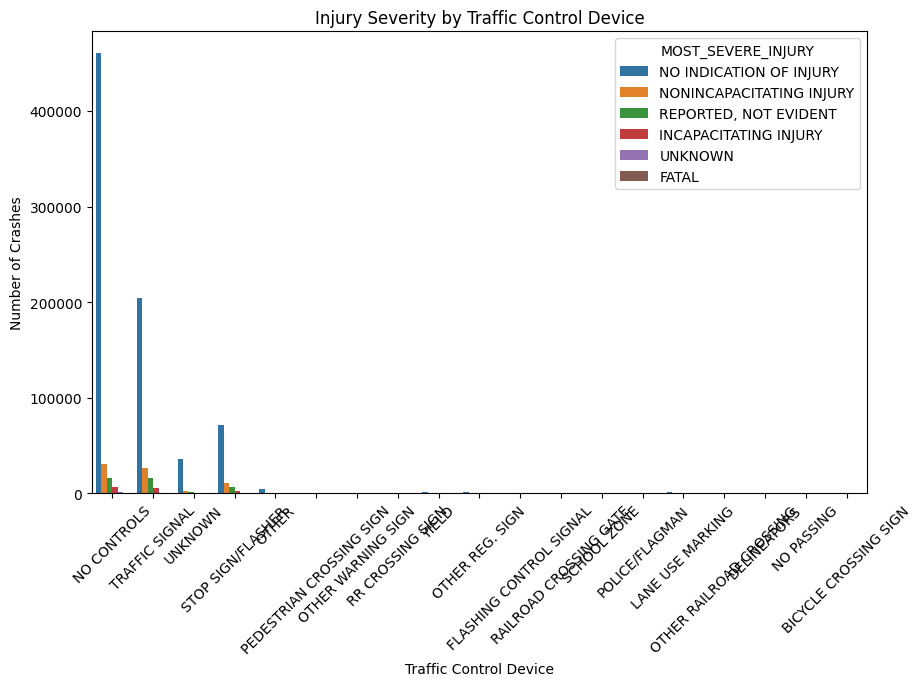

In [31]:
# Plot injury severity by traffic control device
plt.figure(figsize=(10, 6))
sns.countplot(x='TRAFFIC_CONTROL_DEVICE', hue='MOST_SEVERE_INJURY', data=df)
plt.title('Injury Severity by Traffic Control Device')
plt.xlabel('Traffic Control Device')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

<ipython-input-32-10b173a6a085>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DAMAGE', data=df, palette='viridis')


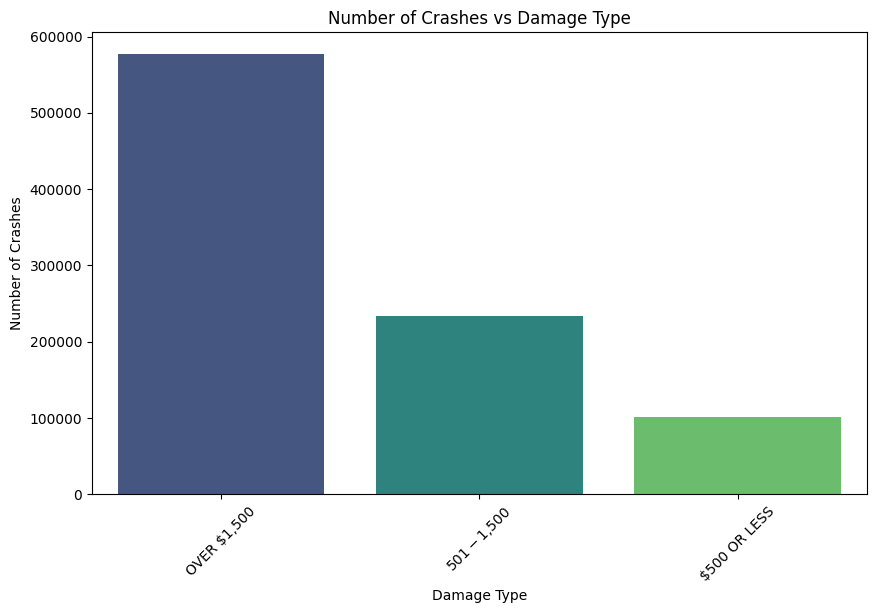

In [32]:
# Plotting Number of Crashes vs Damage Type
plt.figure(figsize=(10, 6))
sns.countplot(x='DAMAGE', data=df, palette='viridis')
plt.title('Number of Crashes vs Damage Type')
plt.xlabel('Damage Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

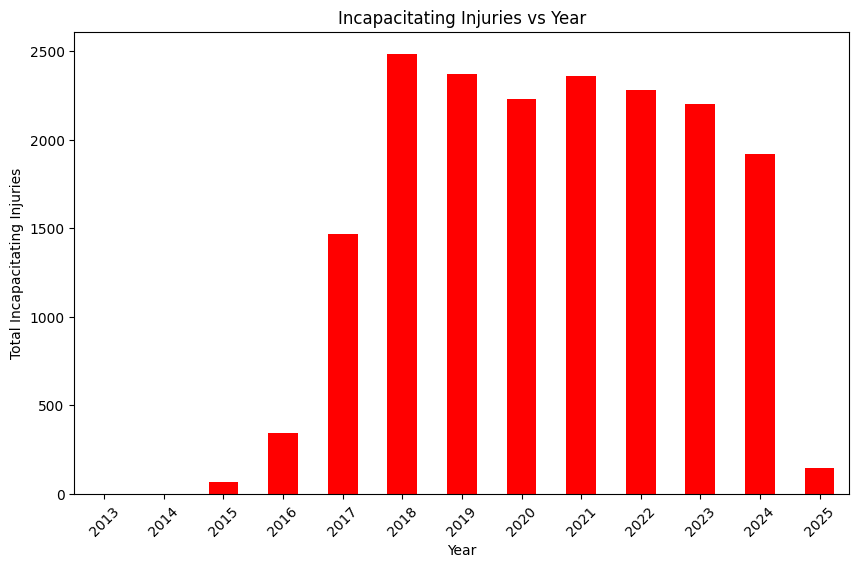

In [33]:
# Group by Year and sum INJURIES_INCAPACITATING
df['Year'] = pd.to_datetime(df['CRASH_DATE']).dt.year  # Extract year from the CRASH_DATE column
fatalities_by_year = df.groupby('Year')['INJURIES_INCAPACITATING'].sum()

# Plotting Fatalities vs Year
plt.figure(figsize=(10, 6))
fatalities_by_year.plot(kind='bar', color='red')
plt.title('Incapacitating Injuries vs Year')
plt.xlabel('Year')
plt.ylabel('Total Incapacitating Injuries')
plt.xticks(rotation=45)
plt.show()


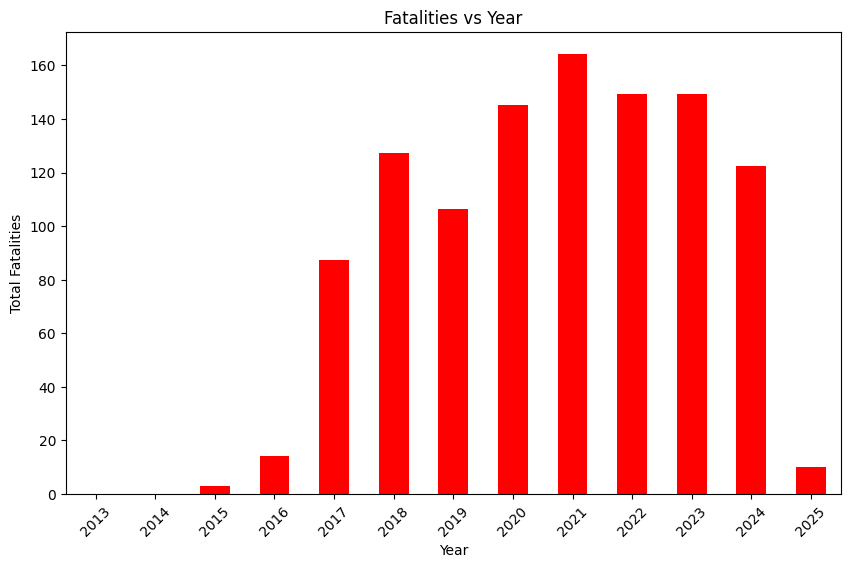

In [34]:
# Group by Year and sum fatalities (INJURIES_FATAL)
df['Year'] = pd.to_datetime(df['CRASH_DATE']).dt.year  # Extract year from the CRASH_DATE column
fatalities_by_year = df.groupby('Year')['INJURIES_FATAL'].sum()

# Plotting Fatalities vs Year
plt.figure(figsize=(10, 6))
fatalities_by_year.plot(kind='bar', color='red')
plt.title('Fatalities vs Year')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.show()


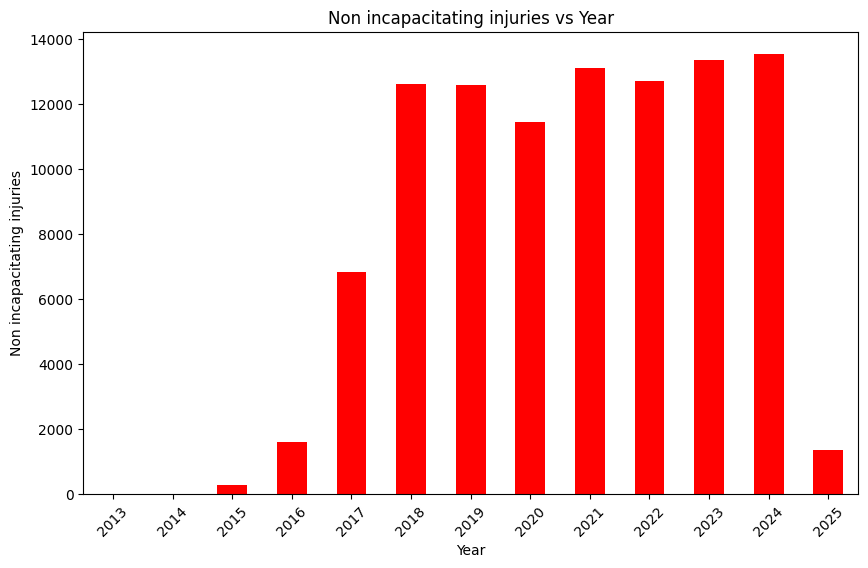

In [35]:
# Group by Year and sum INJURIES_NON_INCAPACITATING
df['Year'] = pd.to_datetime(df['CRASH_DATE']).dt.year  # Extract year from the CRASH_DATE column
INJURIES_NON_INCAPACITATING_by_year = df.groupby('Year')['INJURIES_NON_INCAPACITATING'].sum()

# Plotting non incaapacitating injuries vs Year
plt.figure(figsize=(10, 6))
INJURIES_NON_INCAPACITATING_by_year.plot(kind='bar', color='red')
plt.title('Non incapacitating injuries vs Year')
plt.xlabel('Year')
plt.ylabel('Non incapacitating injuries')
plt.xticks(rotation=45)
plt.show()


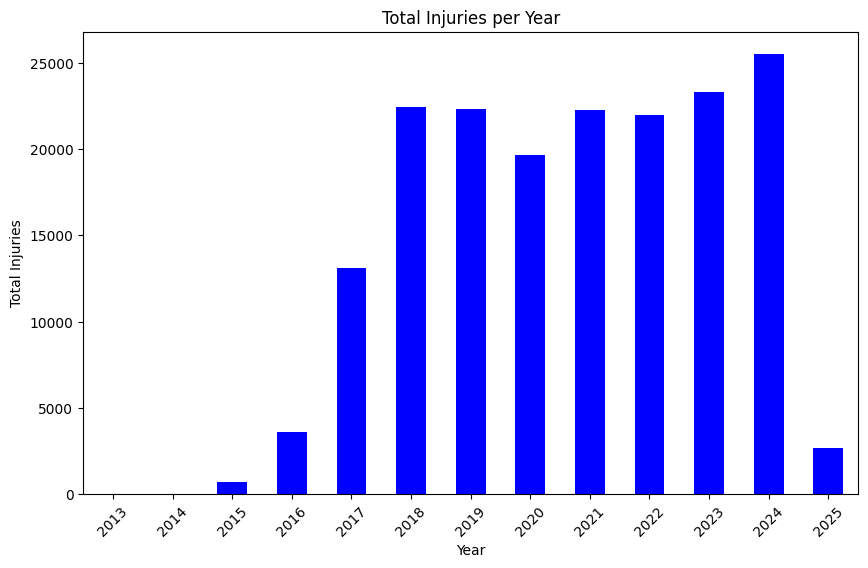

In [36]:
# Ensure CRASH_DATE is in datetime format and extract the year
df['Year'] = pd.to_datetime(df['CRASH_DATE']).dt.year

# Group by Year and sum total injuries
injuries_per_year = df.groupby('Year')['INJURIES_TOTAL'].sum()

# Plot the injuries per year
plt.figure(figsize=(10, 6))
injuries_per_year.plot(kind='bar', color='blue')
plt.title('Total Injuries per Year')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

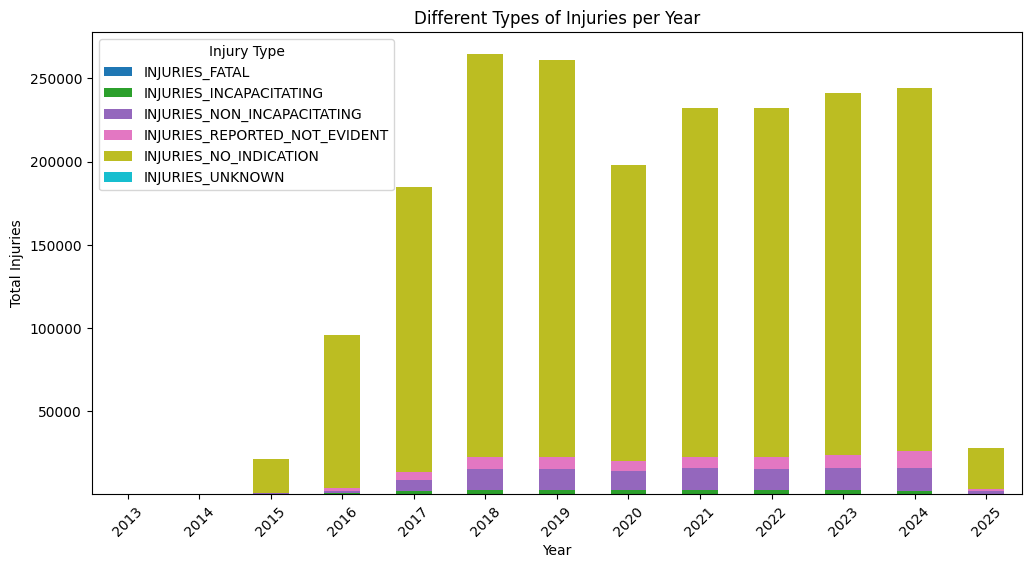

In [37]:
# Ensure CRASH_DATE is in datetime format and extract the year
df['Year'] = pd.to_datetime(df['CRASH_DATE']).dt.year

# Group by year and sum each injury type
injuries_by_year = df.groupby('Year')[[
    'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
    'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
    'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN'
]].sum()

# Plot the injuries per year
plt.figure(figsize=(12, 6))
injuries_by_year.plot(kind='bar', stacked=True, colormap='tab10', figsize=(12, 6))
plt.title('Different Types of Injuries per Year')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.legend(title='Injury Type')
plt.show()


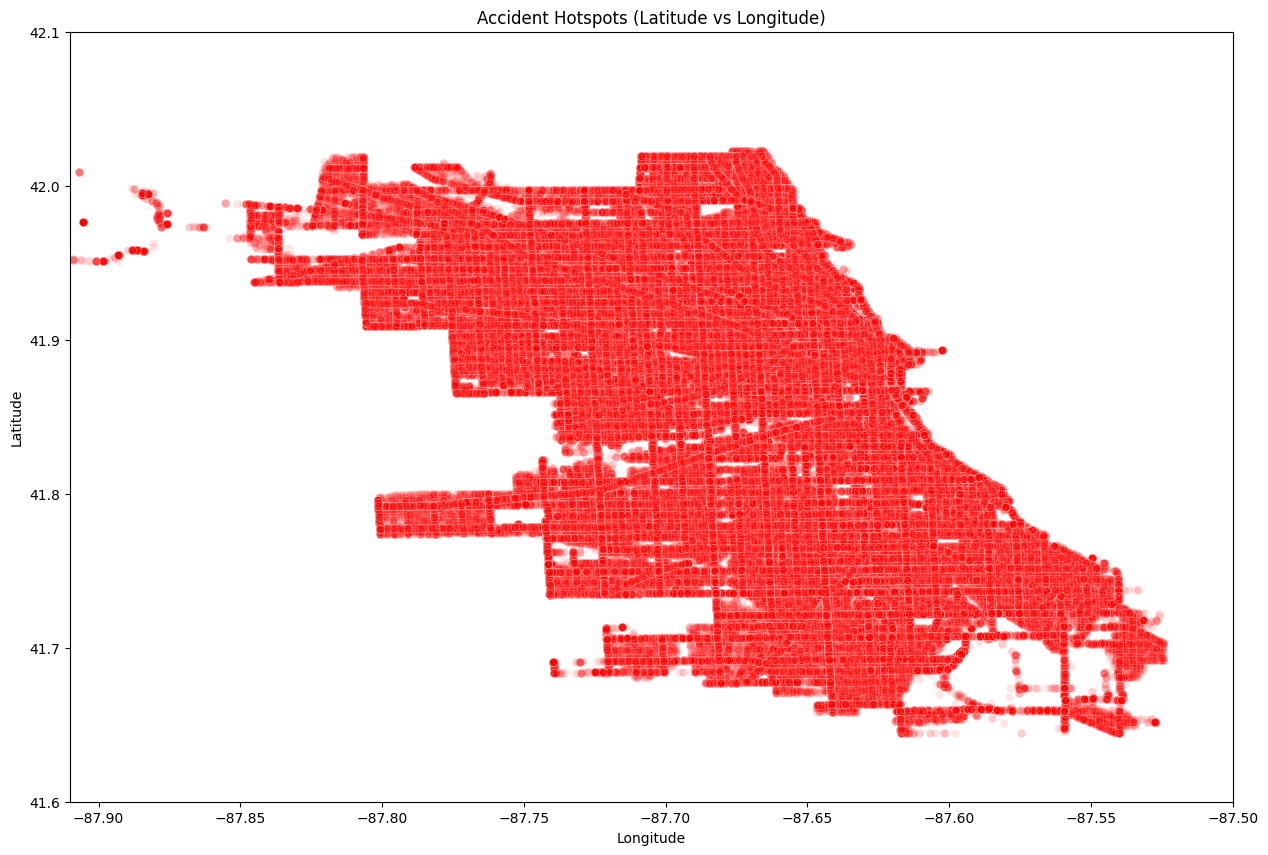

In [38]:
# Longtitude vs Latitude
lat_min, lat_max = 41.6, 42.1
long_min, long_max = -87.91, -87.5

# Plotting
plt.figure(figsize=(15, 10))
sns.scatterplot(x=df['LONGITUDE'], y=df['LATITUDE'], alpha=0.1, color='red')

# Set the zoom limits based on the ranges you've selected
plt.xlim(long_min, long_max)
plt.ylim(lat_min, lat_max)

plt.title("Accident Hotspots (Latitude vs Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


<ipython-input-39-2428660ba1c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='REPORT_TYPE', data=df, palette='viridis')


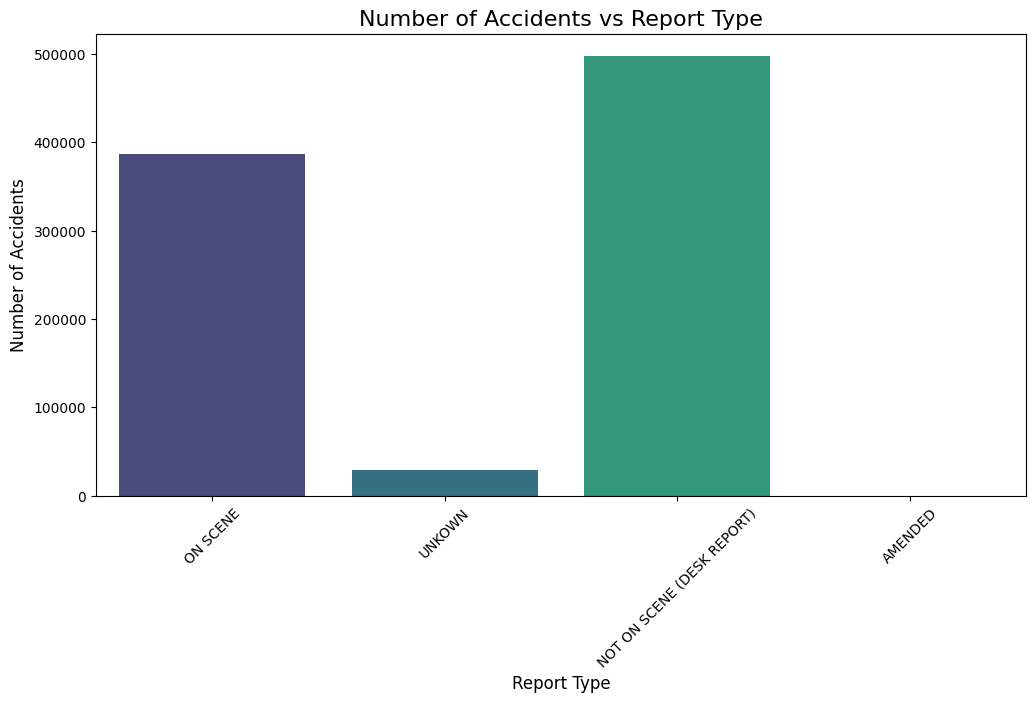

In [39]:
# Create a count plot for REPORT_TYPE vs Number of Accidents
plt.figure(figsize=(12, 6))
sns.countplot(x='REPORT_TYPE', data=df, palette='viridis')

# Title and labels
plt.title("Number of Accidents vs Report Type", fontsize=16)
plt.xlabel("Report Type", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

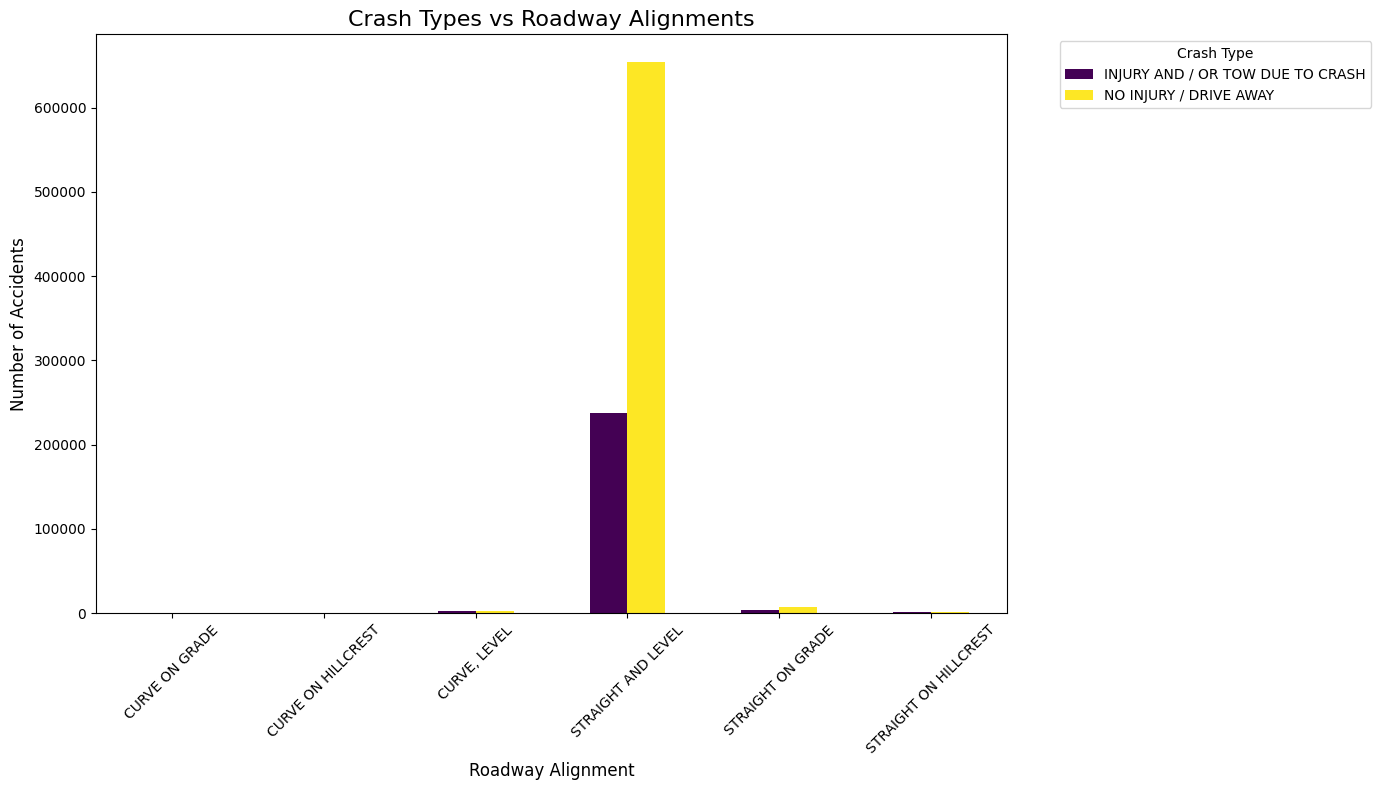

In [40]:
# Pivot table to get counts of Crash Types by Roadway Alignment
pivot_df = pd.crosstab(df['ALIGNMENT'], df['CRASH_TYPE'])

# Plot the clustered bar chart
pivot_df.plot(kind='bar', figsize=(14, 8), colormap='viridis', stacked=False)

# Title and labels
plt.title("Crash Types vs Roadway Alignments", fontsize=16)
plt.xlabel("Roadway Alignment", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Crash Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit the legend
plt.show()

<ipython-input-41-e955117bb914>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PRIM_CONTRIBUTORY_CAUSE', data=df, palette='viridis')
<ipython-input-41-e955117bb914>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEC_CONTRIBUTORY_CAUSE', data=df, palette='viridis')


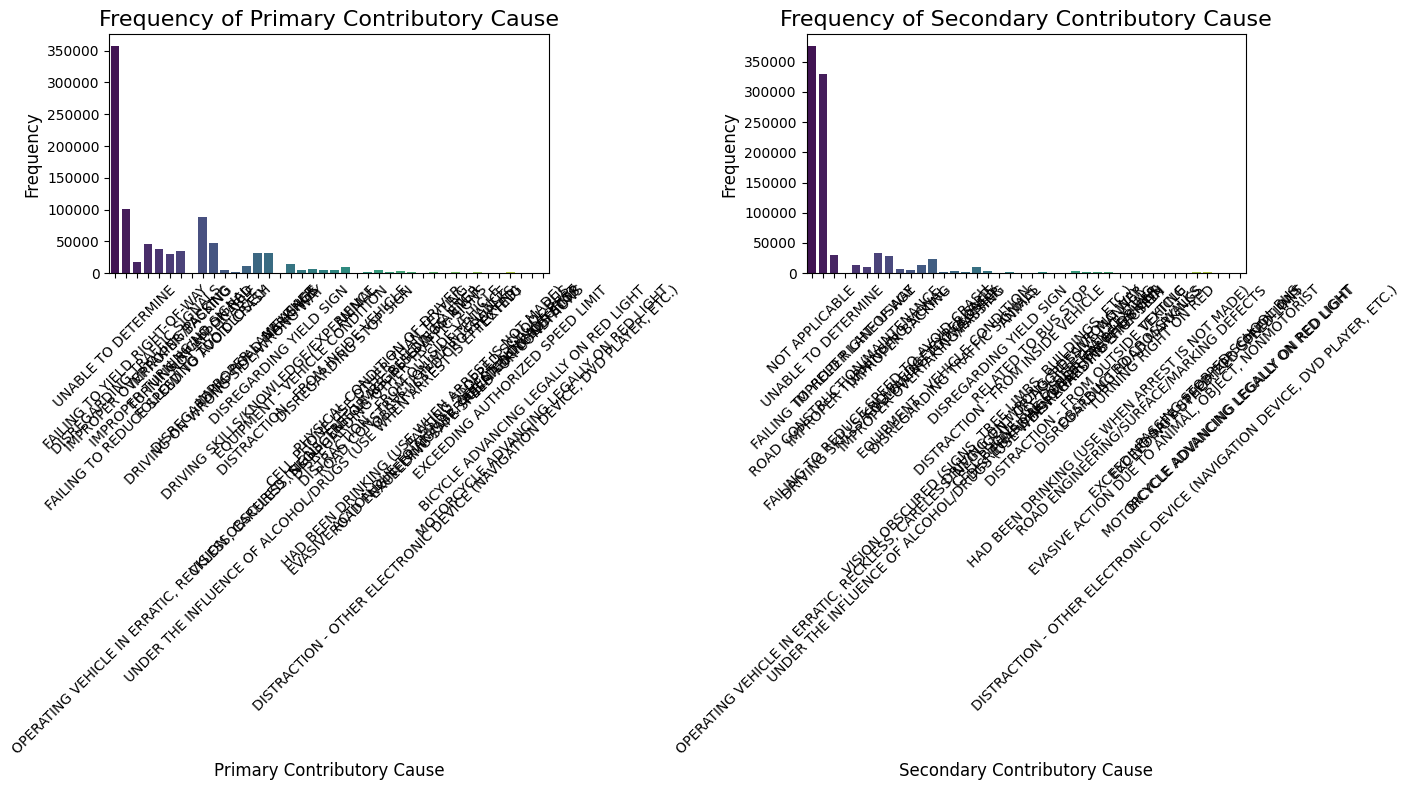

In [41]:
# Create a figure with subplots for primary and secondary contributory causes
plt.figure(figsize=(14, 8))

# Plot for Primary Contributory Cause
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.countplot(x='PRIM_CONTRIBUTORY_CAUSE', data=df, palette='viridis')
plt.title("Frequency of Primary Contributory Cause", fontsize=16)
plt.xlabel("Primary Contributory Cause", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)

# Plot for Secondary Contributory Cause
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.countplot(x='SEC_CONTRIBUTORY_CAUSE', data=df, palette='viridis')
plt.title("Frequency of Secondary Contributory Cause", fontsize=16)
plt.xlabel("Secondary Contributory Cause", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout for better readability
plt.show()

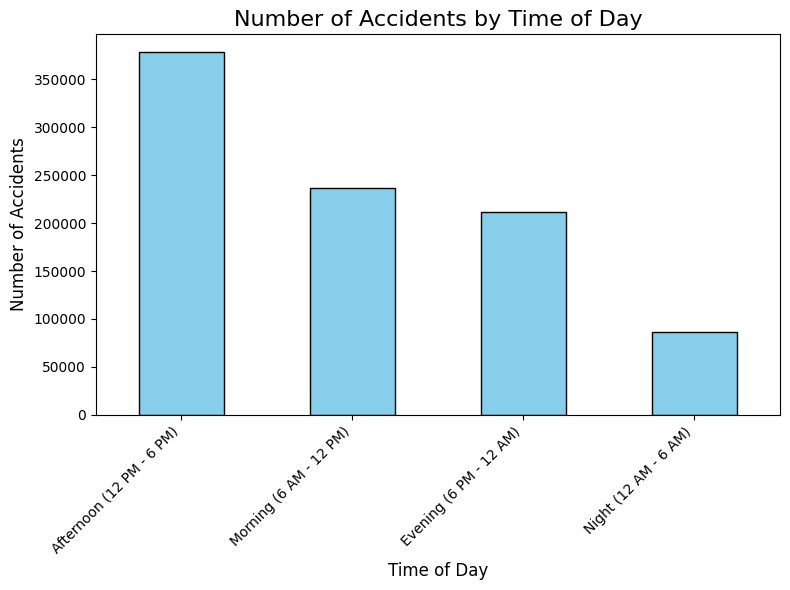

In [42]:
#Accidents in different phase of the day
#Extract the hour from the crash time (already in 24-hour format)
df['CRASH_HOUR'] = pd.to_datetime(df['CRASH_TIME'], format='%H:%M:%S').dt.hour

#Categorize into different phases of the day
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning (6 AM - 12 PM)'
    elif 12 <= hour < 18:
        return 'Afternoon (12 PM - 6 PM)'
    elif 18 <= hour < 24:
        return 'Evening (6 PM - 12 AM)'
    else:
        return 'Night (12 AM - 6 AM)'

df['TIME_OF_DAY'] = df['CRASH_HOUR'].apply(categorize_time_of_day)

#Count the number of accidents in each time phase
accidents_by_time = df['TIME_OF_DAY'].value_counts()

#Plot the result
plt.figure(figsize=(8, 6))
accidents_by_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Accidents by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
